In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
df1 = pd.read_csv('predictive_maintenance.csv')

In [340]:
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [341]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [342]:
df1.loc[:,df1.columns[-1]]=encode.fit_transform(df1.loc[:,df1.columns[-1]])

In [343]:
encode.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [344]:
df1['Power'] = df1['Rotational speed [rpm]']*df1['Torque [Nm]']

In [345]:
x = df1.drop(['Target', 'Failure Type'], axis=1)

In [346]:
y1 = df1['Target']

In [347]:
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,1,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,1,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,1,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,1,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,1,56320.0


In [348]:
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,1,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,1,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,1,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,1,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,1,56320.0


<AxesSubplot:>

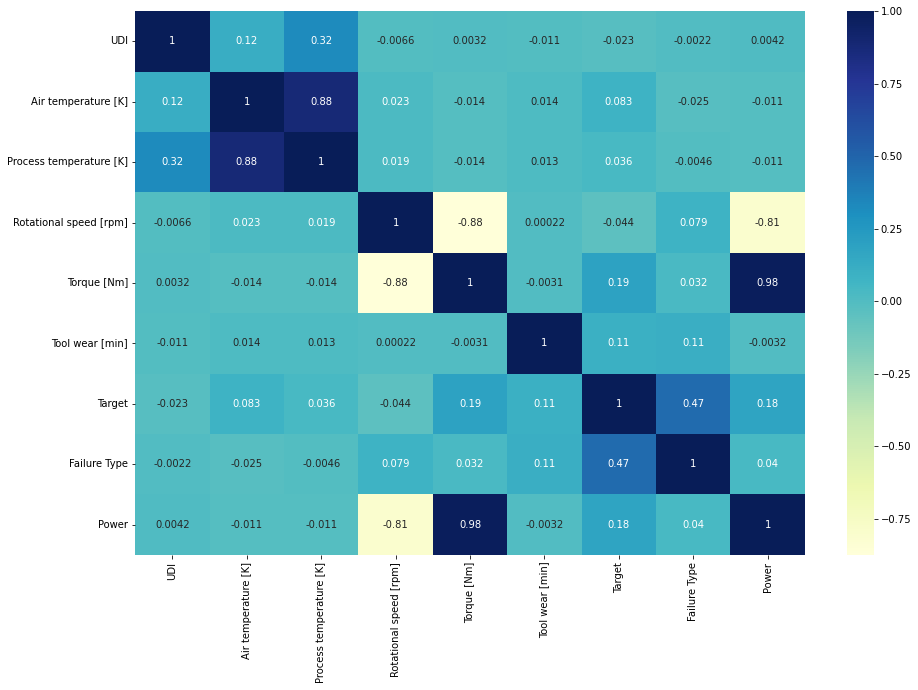

In [349]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df1.corr(),cmap='YlGnBu', annot=True, ax=ax)
#sns.set(rc={'figure.figsize':(40,40)})

## Data Set is imbalanced

<AxesSubplot:xlabel='Target', ylabel='count'>

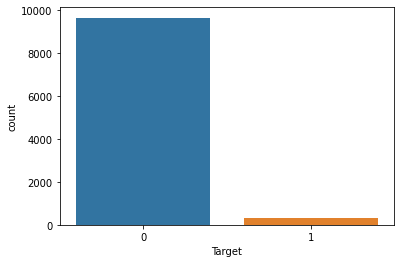

In [350]:
sns.countplot(x=df1['Target'])

In [351]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [352]:
x.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,56320.0


In [353]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(x, y1)
# new class distribution 
print(Counter(y_ros))

Counter({0: 9661, 1: 9661})


In [354]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(x, y1)
print(f"Oversampled: {Counter(y_over)}")

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 9661, 1: 4830})
Combined Random Sampling: Counter({0: 6037, 1: 4830})


<AxesSubplot:xlabel='Target', ylabel='count'>

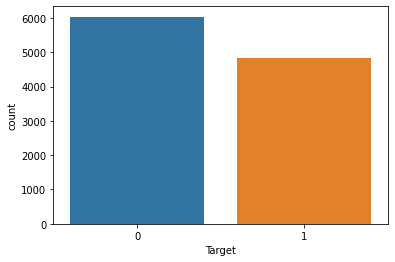

In [355]:
sns.countplot(x=y_combined_sampling)

In [364]:
x_new = X_combined_sampling
y_new = y_combined_sampling

In [365]:
x_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power
0,304.1,313.2,2028,18.9,45,38329.2
1,297.7,308.7,1688,27.2,125,45913.6
2,300.5,309.4,1877,23.8,31,44672.6
3,300.5,309.3,1470,40.8,219,59976.0
4,301.6,310.6,1599,36.1,208,57723.9


In [366]:
y_new

0        0
1        0
2        0
3        0
4        0
        ..
10862    1
10863    1
10864    1
10865    1
10866    1
Name: Target, Length: 10867, dtype: int64

In [367]:
x_new.drop(['UDI', 'Product ID', 'Type'], axis=1, inplace=True)

KeyError: "['UDI' 'Product ID' 'Type'] not found in axis"

In [363]:
x_new

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power
0,304.1,313.2,2028,18.9,45,38329.2
1,297.7,308.7,1688,27.2,125,45913.6
2,300.5,309.4,1877,23.8,31,44672.6
3,300.5,309.3,1470,40.8,219,59976.0
4,301.6,310.6,1599,36.1,208,57723.9
...,...,...,...,...,...,...
10862,302.4,310.1,1379,48.9,107,67433.1
10863,302.0,310.5,1370,44.4,85,60828.0
10864,303.4,312.0,1521,35.9,215,54603.9
10865,301.8,310.3,1341,50.5,64,67720.5


In [205]:
df_test = x_new.copy()

In [206]:
df_test['Target'] = y_new.copy()

In [207]:
df_test.tail()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,Target
10862,302.0,310.4,1212,55.6,79,67387.2,1
10863,302.6,311.0,1284,68.0,114,87312.0,1
10864,301.6,310.6,1309,65.8,75,86132.2,1
10865,302.6,310.2,1325,62.4,92,82680.0,1
10866,302.2,311.3,1530,37.3,207,57069.0,1


In [208]:
x_new

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power
0,296.9,307.5,1397,48.3,22,67475.1
1,297.2,308.5,1584,40.0,4,63360.0
2,297.7,308.4,1487,41.4,84,61561.8
3,298.4,309.7,1679,33.3,167,55910.7
4,301.4,310.7,1639,29.8,127,48842.2
...,...,...,...,...,...,...
10862,302.0,310.4,1212,55.6,79,67387.2
10863,302.6,311.0,1284,68.0,114,87312.0
10864,301.6,310.6,1309,65.8,75,86132.2
10865,302.6,310.2,1325,62.4,92,82680.0


In [209]:
from sklearn.model_selection import train_test_split

In [210]:
x_new

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power
0,296.9,307.5,1397,48.3,22,67475.1
1,297.2,308.5,1584,40.0,4,63360.0
2,297.7,308.4,1487,41.4,84,61561.8
3,298.4,309.7,1679,33.3,167,55910.7
4,301.4,310.7,1639,29.8,127,48842.2
...,...,...,...,...,...,...
10862,302.0,310.4,1212,55.6,79,67387.2
10863,302.6,311.0,1284,68.0,114,87312.0
10864,301.6,310.6,1309,65.8,75,86132.2
10865,302.6,310.2,1325,62.4,92,82680.0


In [211]:
y_new

0        0
1        0
2        0
3        0
4        0
        ..
10862    1
10863    1
10864    1
10865    1
10866    1
Name: Target, Length: 10867, dtype: int64

In [212]:
#x_new.drop(['Rotational speed [rpm]'], axis=1, inplace=True)

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.3)

In [214]:
x_new

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power
0,296.9,307.5,1397,48.3,22,67475.1
1,297.2,308.5,1584,40.0,4,63360.0
2,297.7,308.4,1487,41.4,84,61561.8
3,298.4,309.7,1679,33.3,167,55910.7
4,301.4,310.7,1639,29.8,127,48842.2
...,...,...,...,...,...,...
10862,302.0,310.4,1212,55.6,79,67387.2
10863,302.6,311.0,1284,68.0,114,87312.0
10864,301.6,310.6,1309,65.8,75,86132.2
10865,302.6,310.2,1325,62.4,92,82680.0


## Searching for model to get best accuracy

## 1. Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
lr = LogisticRegression(solver='lbfgs', random_state=0, verbose=1)

In [217]:
lr.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(random_state=0, verbose=1)

In [218]:
lr.score(x_test, y_test)

0.8344066237350506

In [219]:
y_pred_lr = lr.predict(x_test)

In [220]:
from sklearn import metrics 
print("TEST ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_lr))

TEST ACCURACY OF THE MODEL:  0.8344066237350506


In [221]:
y_pred_cm = lr.predict(x_new)

In [222]:
from sklearn.metrics import confusion_matrix
cf_matrix_lr = confusion_matrix(y_new, y_pred_cm)
print(cf_matrix_lr)

[[5230  807]
 [ 975 3855]]


<AxesSubplot:>

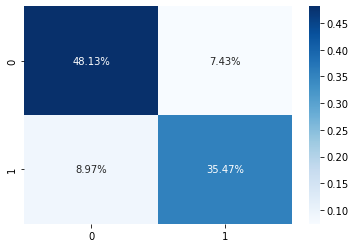

In [223]:
sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, 
            fmt='.2%', cmap='Blues')

In [224]:
df_test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,Target
0,296.9,307.5,1397,48.3,22,67475.1,0
1,297.2,308.5,1584,40.0,4,63360.0,0
2,297.7,308.4,1487,41.4,84,61561.8,0
3,298.4,309.7,1679,33.3,167,55910.7,0
4,301.4,310.7,1639,29.8,127,48842.2,0


<AxesSubplot:xlabel='Torque [Nm]', ylabel='Target'>

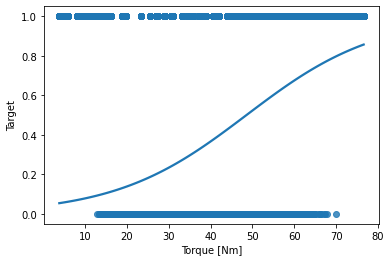

In [225]:
sns.regplot(x=df_test['Torque [Nm]'], y=df_test['Target'], data=df_test, logistic=True, ci=None)

<AxesSubplot:xlabel='Power', ylabel='Target'>

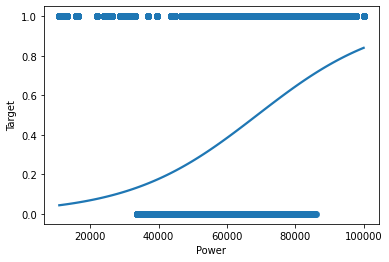

In [226]:
sns.regplot(x=df_test['Power'], y=df_test['Target'], data=df_test, logistic=True, ci=None)

## 2. KNN

In [227]:
from sklearn.neighbors import KNeighborsClassifier

Maximum accuracy:- 0.983440662373505 at K = 0


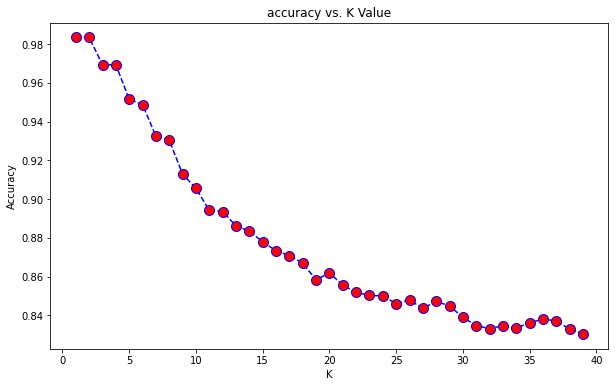

In [228]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [229]:
knn = KNeighborsClassifier(n_neighbors=2)

In [230]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [231]:
print(knn.score(x_test, y_test))

0.983440662373505


In [232]:
y_pred_knn = knn.predict(x_new)

In [233]:
cm_matrix_knn = confusion_matrix(y_new, y_pred_knn)
print(cm_matrix_knn)

[[5983   54]
 [   0 4830]]


<AxesSubplot:>

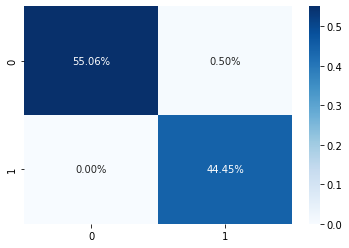

In [234]:
sns.heatmap(cm_matrix_knn/np.sum(cm_matrix_knn), annot=True, 
            fmt='.2%', cmap='Blues')

In [235]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y_new == cl, 0], y=x_new[y_new == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

NameError: name 'y' is not defined

In [236]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [237]:
df_test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,Target
0,296.9,307.5,1397,48.3,22,67475.1,0
1,297.2,308.5,1584,40.0,4,63360.0,0
2,297.7,308.4,1487,41.4,84,61561.8,0
3,298.4,309.7,1679,33.3,167,55910.7,0
4,301.4,310.7,1639,29.8,127,48842.2,0


In [238]:
def knn_comparison(data, k):
 x = df_test[['Torque [Nm]']].values
 y = data[‘class’].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel(‘X’)
 plt.ylabel(‘Y’)
 plt.title(‘Knn with K=’+ str(k))
 plt.show()

SyntaxError: invalid character '‘' (U+2018) (Temp/ipykernel_16140/4086710459.py, line 3)

# 3. SVM

In [266]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state = 1)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=1)

In [267]:
y_pred_svm = svm.predict(x_new)

In [268]:
from sklearn.metrics import confusion_matrix
cm_matrix_svm = confusion_matrix(y_new, y_pred_svm)
print(cm_matrix_svm)

[[4677 1360]
 [ 952 3878]]


<AxesSubplot:>

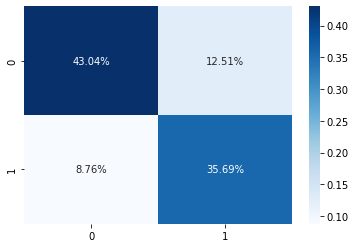

In [269]:
sns.heatmap(cm_matrix_svm/np.sum(cm_matrix_svm), annot=True, 
            fmt='.2%', cmap='Blues')

In [270]:
svm_pred = svm.predict(x_test)

In [271]:
svm_pred = np.reshape(svm_pred,(1,-1))

In [272]:
from sklearn.metrics import confusion_matrix
accuracy = float(cm_matrix_svm.diagonal().sum())/len(y_pred_svm)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.7872457900064416


In [289]:
x_new

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power
0,296.9,307.5,1397,48.3,22,67475.1
1,297.2,308.5,1584,40.0,4,63360.0
2,297.7,308.4,1487,41.4,84,61561.8
3,298.4,309.7,1679,33.3,167,55910.7
4,301.4,310.7,1639,29.8,127,48842.2
...,...,...,...,...,...,...
10862,302.0,310.4,1212,55.6,79,67387.2
10863,302.6,311.0,1284,68.0,114,87312.0
10864,301.6,310.6,1309,65.8,75,86132.2
10865,302.6,310.2,1325,62.4,92,82680.0


In [377]:
x_new.drop(['Rotational speed [rpm]'], axis=1, inplace=True)

In [442]:
x_new

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Power
0,304.1,313.2,18.9,45,38329.2
1,297.7,308.7,27.2,125,45913.6
2,300.5,309.4,23.8,31,44672.6
3,300.5,309.3,40.8,219,59976.0
4,301.6,310.6,36.1,208,57723.9
...,...,...,...,...,...
10862,302.4,310.1,48.9,107,67433.1
10863,302.0,310.5,44.4,85,60828.0
10864,303.4,312.0,35.9,215,54603.9
10865,301.8,310.3,50.5,64,67720.5


## 4. Random Forest

In [500]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30)

In [501]:
rf1 = RandomForestClassifier(n_jobs=-1, bootstrap=True, max_depth=11, verbose=1) 

In [502]:
rf1.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=11, n_jobs=-1, verbose=1)

In [503]:
y_pred_rf = rf1.predict(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [504]:
y_pred_rf_cm = rf1.predict(x_new)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [505]:
from sklearn import metrics 
print("TEST ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_rf))

TEST ACCURACY OF THE MODEL:  0.9889604415823368


In [506]:
from sklearn.metrics import confusion_matrix
cf_matrix_rf = confusion_matrix(y_new, y_pred_rf_cm)
print(cf_matrix_rf)

[[5971   66]
 [   0 4830]]


<AxesSubplot:>

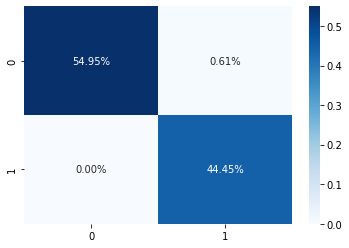

In [507]:
sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, 
            fmt='.2%', cmap='Blues')

## Model for Failure Type

In [395]:
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Power
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,1,66382.8
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,1,65190.4
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,1,74001.2
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,1,56603.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,1,56320.0


In [422]:
x2 = df1.drop(['Target', 'Failure Type', 'Rotational speed [rpm]', 'UDI', 'Product ID', 'Type'], axis=1)

In [423]:
y2 = df1['Failure Type']

In [424]:
x2.head()

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Power
0,298.1,308.6,42.8,0,66382.8
1,298.2,308.7,46.3,3,65190.4
2,298.1,308.5,49.4,5,74001.2
3,298.2,308.6,39.5,7,56603.5
4,298.2,308.7,40.0,9,56320.0


<AxesSubplot:xlabel='Failure Type', ylabel='count'>

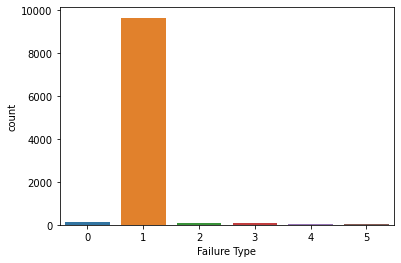

In [425]:
sns.countplot(x=df1['Failure Type'])

# Data Set is imbalanced

In [426]:
# instantiating over and under sampler
over = RandomOverSampler()
under = RandomUnderSampler()
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(x2, y2)
print(f"Oversampled: {Counter(y_over)}")

# now to comine under sampling 
x_combined_sampling2, y_combined_sampling2 = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({1: 9652, 3: 9652, 5: 9652, 2: 9652, 4: 9652, 0: 9652})
Combined Random Sampling: Counter({0: 6037, 1: 4830})


<AxesSubplot:xlabel='Failure Type', ylabel='count'>

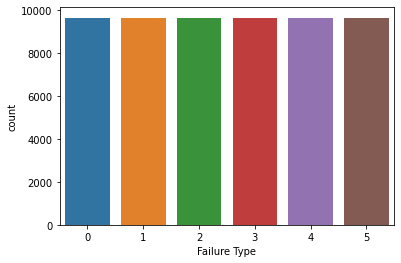

In [427]:
sns.countplot(x=y_combined_sampling2)

In [465]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_combined_sampling2, y_combined_sampling2, test_size = 0.30)

In [466]:
rf2 = RandomForestClassifier(n_jobs=-1, bootstrap=True, max_depth=10) 

In [467]:
rf2.fit(x_train2, y_train2)

RandomForestClassifier(max_depth=10, n_jobs=-1)

In [469]:
y_pred2 = rf2.predict(x_test2)

In [470]:
y_pred3 = rf2.predict(x_train2)

In [471]:
y_pred_cm2 = rf2.predict(x_combined_sampling2)

In [472]:
from sklearn import metrics 
print("TEST ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test2, y_pred2))

TEST ACCURACY OF THE MODEL:  0.9848624381259353


In [473]:
print("TRAIN ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train2, y_pred3))

TRAIN ACCURACY OF THE MODEL:  0.9862598056144852


In [474]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_combined_sampling2, y_pred_cm2)
print(cf_matrix)

[[9652    0    0    0    0    0]
 [ 276 8832   43    0  114  387]
 [   0    0 9652    0    0    0]
 [   0    0    0 9652    0    0]
 [   0    0    0    0 9652    0]
 [   0    0    0    0    0 9652]]


<AxesSubplot:>

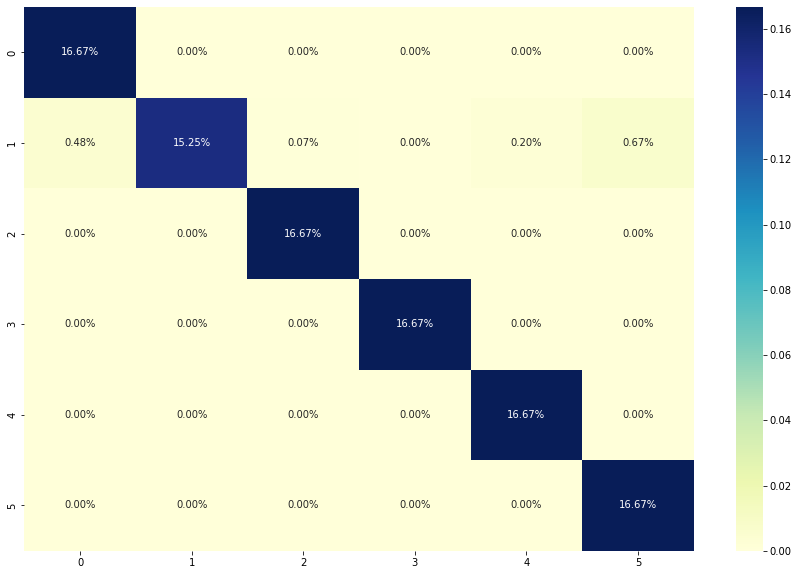

In [475]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='YlGnBu',ax=ax)

## Dumping both the model (for Target and Failure type into a pickle file)

In [476]:
x_test2

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Power
48977,302.6,311.5,34.4,228,56037.6
54247,297.8,308.9,25.6,200,47897.6
13684,298.8,308.6,55.8,155,70754.4
38029,302.6,310.4,66.8,80,91182.0
24326,304.0,312.9,62.5,200,85187.5
...,...,...,...,...,...
22667,300.7,311.8,58.4,189,78022.4
38846,300.9,310.7,57.5,16,81190.0
3453,302.3,310.9,48.4,130,66114.4
1840,301.9,310.4,48.0,73,65904.0


In [477]:
x_new

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Power
0,304.1,313.2,18.9,45,38329.2
1,297.7,308.7,27.2,125,45913.6
2,300.5,309.4,23.8,31,44672.6
3,300.5,309.3,40.8,219,59976.0
4,301.6,310.6,36.1,208,57723.9
...,...,...,...,...,...
10862,302.4,310.1,48.9,107,67433.1
10863,302.0,310.5,44.4,85,60828.0
10864,303.4,312.0,35.9,215,54603.9
10865,301.8,310.3,50.5,64,67720.5


In [496]:
x = np.array([[302,380,80,100,80913]])

In [497]:
rf2.predict(x)

C:\Users\214220002\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [490]:
df_columns = x_test.columns

In [491]:
df_columns

Index(['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
       'Tool wear [min]', 'Power'],
      dtype='object')

In [492]:
df_test = pd.DataFrame(x, columns = df_columns)

In [498]:
rf2.predict(df_test)

array([1])

In [499]:
import pickle

In [509]:
Q1=Q2=Q3=Q4=Q5=0

In [510]:
data = {'model1':rf1, 'Q1':Q1, 'Q2':Q2, 'Q3':Q3, 'Q4':Q4, 'Q5':Q5}

with open('saved_steps_rf1.pkl', 'wb') as file:
    pickle.dump(data,file)

In [512]:
data = {'model2':clf2, 'Q1':Q1, 'Q2':Q2, 'Q3':Q3, 'Q4':Q4, 'Q5':Q5}

with open('saved_steps_rf2.pkl', 'wb') as file:
    pickle.dump(data,file)